# **Crop Disease Identification:** Developing deep learning models to accurately identify diseases in crops based on images of leaves or plants. Early detection of diseases can help farmers take preventive measures to protect their crops and ensure a more abundant harvest.

In [ ]:
pip install kaggle

In [ ]:
pip install plotly

In [ ]:
from google.colab import files
files.upload()


TypeError: ignored

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset -p /content/drive/MyDrive/Plant\ disease\ prediction


In [1]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/Plant disease prediction/new-plant-diseases-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/sample_data')


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.layers  import Concatenate
from tensorflow.keras.layers import AveragePooling2D, Dropout, Input, BatchNormalization
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Input, Add, Dense,GlobalAvgPool2D, Concatenate, AvgPool2D, Dropout, ReLU, Activation, MaxPool2D, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
import matplotlib.pyplot as plt # for ploting graph
import os
#-------------------------------------------------------------------------------
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
#For ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from time import perf_counter
#-------------------------------------------------------------------------------
import plotly.graph_objects as go_obj
from plotly.subplots import make_subplots
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataset_root = "/content/sample_data/new plant diseases dataset(augmented)"
train_path = "/content/sample_data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_path = "/content/sample_data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid"
test_path  = "/content/sample_data/test"
diseases   = os.listdir(train_path) # name of the disease here

In [4]:
batch_size=50

In [5]:
#Setting the Traning dataset folder
training_set = ImageDataGenerator( rescale = 1/255.5)
training_data = training_set.flow_from_directory(
    train_path,
    target_size = (224,224),
    class_mode = "categorical",
    batch_size = batch_size
  )

Found 70295 images belonging to 38 classes.


In [6]:
#Setting the validation dataset folder
validation_set = ImageDataGenerator( rescale = 1/255.5)
validation_data = validation_set.flow_from_directory(
    valid_path,
    target_size = (224,224),
    class_mode = "categorical",
    shuffle = False,  # For corretly printing the ConfusionMartix and Roc curvs
    batch_size = batch_size
)

Found 17572 images belonging to 38 classes.


In [7]:
#Finding the categories
categories = training_data.class_indices.keys()
print(categories)

dict_keys(['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato__

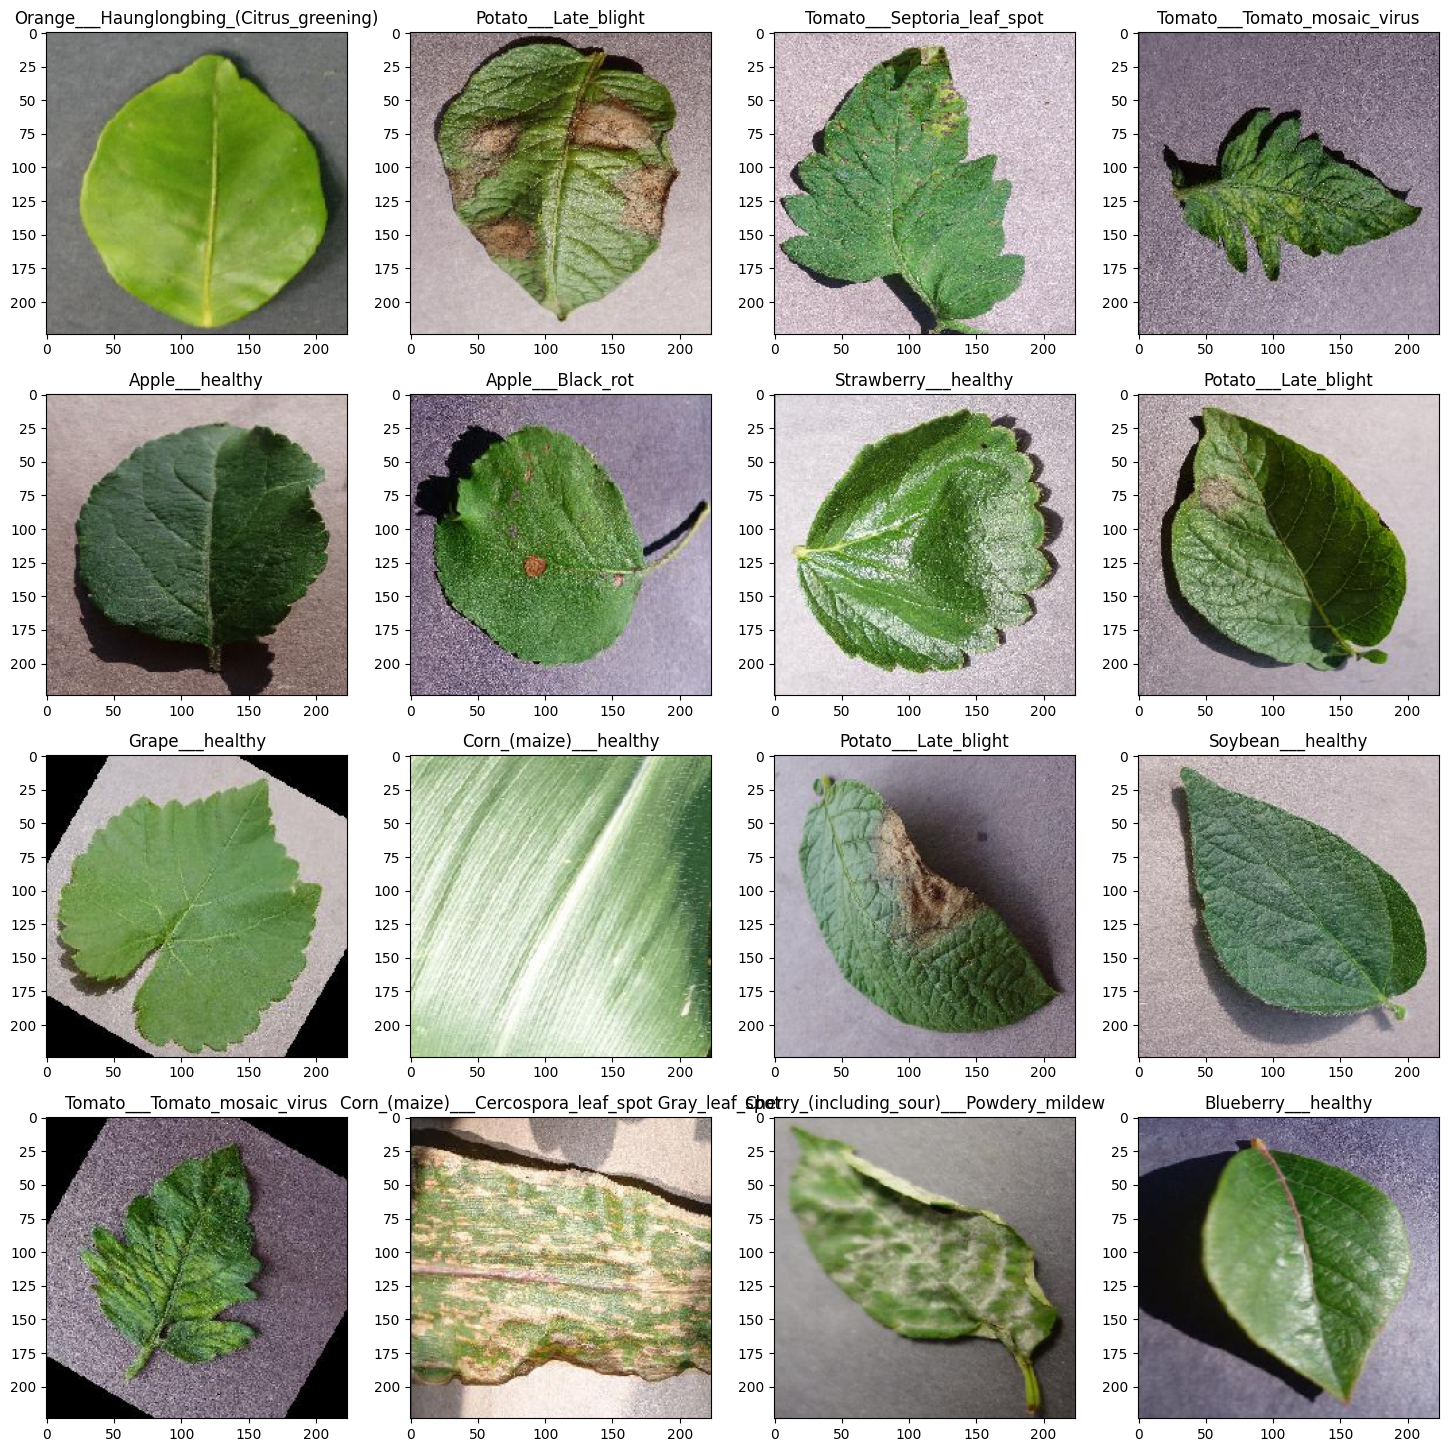

In [8]:
#getting the class name and displaying 16 images and its class name
classes=list(training_data.class_indices.keys())
plt.figure(figsize=(18,18))
for X_batch, y_batch in training_data:

    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
   # plt.savefig('rnd.jpg', bbox_inches = 'tight')
    break

In [9]:
import matplotlib.backends.backend_pdf as pdf

# Create a PDF file to store the images
pdf_pages = pdf.PdfPages('image_output.pdf')

# Loop through the images and save them to the PDF
for X_batch, y_batch in training_data:
    fig = plt.figure(figsize=(18, 18))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i] == 1)[0][0]])
        plt.axis('off')  # Turn off axis
    pdf_pages.savefig(fig, bbox_inches='tight')  # Save the current figure to the PDF
    plt.close(fig)  # Close the current figure to free up memory
    # Break the loop after the first batch
    break

# Close the PDF file
pdf_pages.close()


In [10]:
#Finding Number of Uniqe plantes in the dataset
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1
print(f"Unique Plants are: \n{plants}\n")
# displayig number of unique diseases
print("Number of diseases are: {}".format(NumberOfDiseases))

Unique Plants are: 
['Cherry_(including_sour)', 'Raspberry', 'Corn_(maize)', 'Tomato', 'Apple', 'Strawberry', 'Grape', 'Potato', 'Blueberry', 'Orange', 'Peach', 'Pepper,_bell', 'Squash', 'Soybean']

Number of diseases are: 26


In [11]:
# Number of images for each disease
nums_train = {}
nums_val = {}
for disease in diseases:
    nums_train[disease] = len(os.listdir(train_path + '/' + disease))
    nums_val[disease] = len(os.listdir(valid_path + '/' + disease))
img_per_class_train = pd.DataFrame(nums_train.values(), index=nums_train.keys(), columns=["no. of images"])
print('Train datast distribution :')
img_per_class_train

Train datast distribution :


no. of images
Cherry_(including_sour)___Powdery_mildew                     1683
Raspberry___healthy                                          1781
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot           1642
Cherry_(including_sour)___healthy                            1826
Tomato___Bacterial_spot                                      1702
Apple___healthy                                              2008
Strawberry___healthy                                         1824
Grape___Black_rot                                            1888
Tomato___Septoria_leaf_spot                                  1745
Potato___Late_blight                                         1939
Tomato___Tomato_mosaic_virus                                 1790
Apple___Apple_scab                                           2016
Blueberry___healthy                                          1816
Orange___Haunglongbing_(Citrus_greening)                     2010
Peach___healthy                                              1728
Potato___healthy                                             1824
Tomato___Leaf_Mold                                           1882
Corn_(maize)___healthy                                       1859
Strawberry___Leaf_scorch                                     1774
Potato___Early_blight                                        1939
Tomato___Tomato_Yellow_Leaf_Curl_Virus                       1961
Pepper,_bell___healthy                                       1988
Squash___Powdery_mildew                                      1736
Tomato___Early_blight                                        1920
Peach___Bacterial_spot                                       1838
Tomato___healthy                                             1926
Tomato___Target_Spot                                         1827
Soybean___healthy                                            2022
Apple___Cedar_apple_rust                                     1760
Corn_(maize)___Northern_Leaf_Blight                          1908
Corn_(maize)___Common_rust_                                  1907
Grape___Esca_(Black_Measles)                                 1920
Tomato___Late_blight                                         1851
Tomato___Spider_mites Two-spotted_spider_mite                1741
Pepper,_bell___Bacterial_spot                                1913
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                   1722
Apple___Black_rot                                            1987
Grape___healthy                                              1692

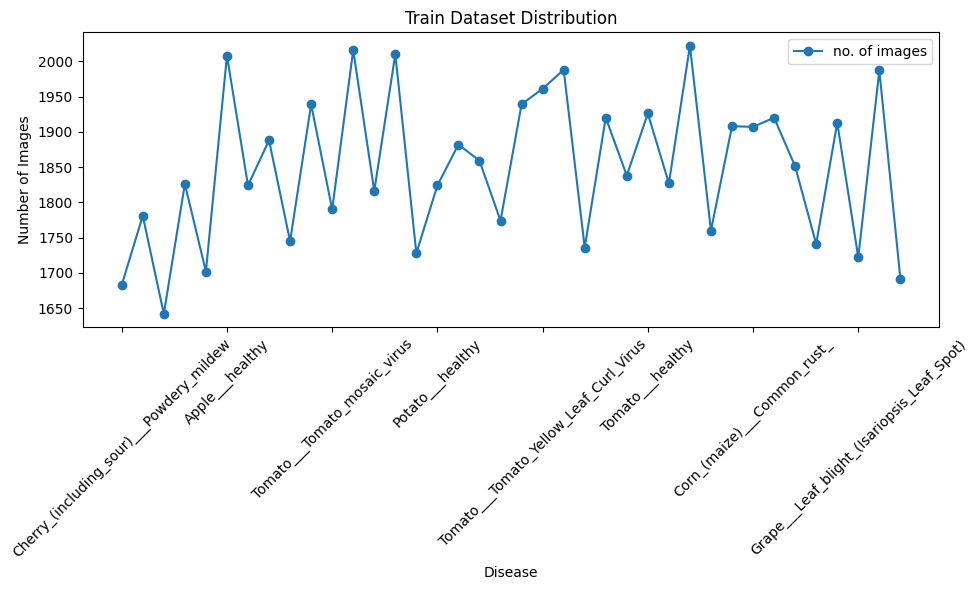

In [12]:
import matplotlib.backends.backend_pdf as pdf
import pandas as pd

# Create a PDF file to store the dataset distribution
pdf_pages = pdf.PdfPages('train_dataset_distribution_curve.pdf')

# Create a DataFrame for the train dataset distribution
img_per_class_train = pd.DataFrame(nums_train.values(), index=nums_train.keys(), columns=["no. of images"])

# Plot the dataset distribution as a curve
fig, ax = plt.subplots(figsize=(10, 6))
img_per_class_train.plot(kind='line', marker='o', ax=ax)
plt.title('Train Dataset Distribution')
plt.xlabel('Disease')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot to the PDF
pdf_pages.savefig(fig, bbox_inches='tight')

# Close the PDF file
pdf_pages.close()


Text(0.5, 1.0, 'Images per each class of plant disease')

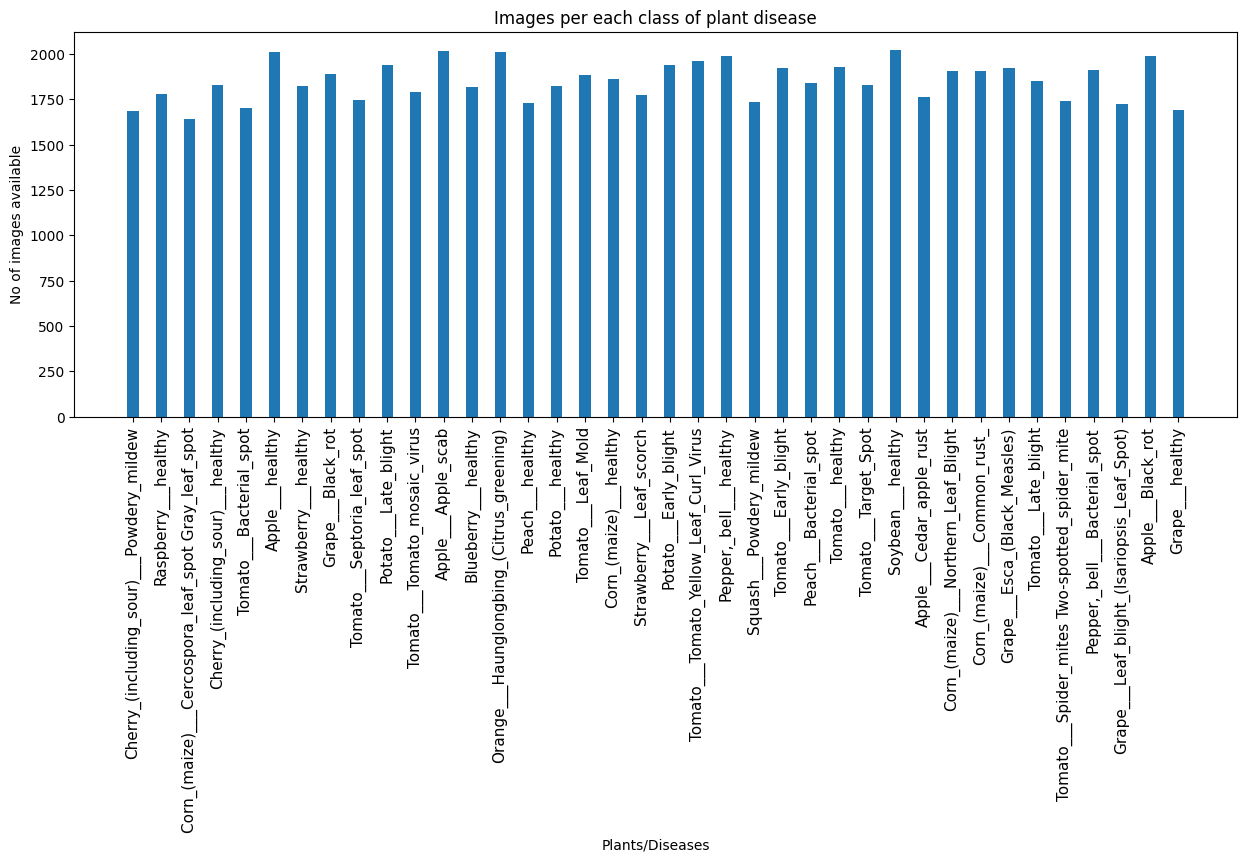

In [13]:
# section for visualising each class in the training raw dataset
train_diratory=train_path
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_path + '/' + disease))

# plotting number of images available for each image classes
index = [n for n in range(38)]
plt.figure(figsize=(15, 5))
plt.bar(index, [n for n in nums.values()], width=0.4)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=11, rotation=90)
plt.title('Images per each class of plant disease')

In [14]:
#BLUR IMAGE
def make_blur(original_images_dir, blurred_images_dir):
    # Create the output directory if it doesn't exist
    if not os.path.exists(blurred_images_dir):
        os.makedirs(blurred_images_dir)

    # Define the degree of blur (you can adjust this value)
    sigma = 2.0

    print_img = True # If you want to show images, make it True

    # Iterate through each image in the original directory
    for filename in os.listdir(original_images_dir):
        if filename.endswith('.JPG') or filename.endswith('.png'):  # Adjust the file extensions as needed
            # Read the original potato image
            image_path = os.path.join(original_images_dir, filename)
            img = cv2.imread(image_path)

            # Apply Gaussian blur
            blurred_img = cv2.GaussianBlur(img, (0, 0), sigma)

            # Save the blurred potato image
            output_path = os.path.join(blurred_images_dir, filename)
            cv2.imwrite(output_path, blurred_img)

            if print_img:
                display(Image(filename=image_path))
                plt.imshow(blurred_img)
                plt.axis('off')
                plt.show()
                print_img = False
    print("Blurring of potato images completed.")

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

from IPython.display import Image, display

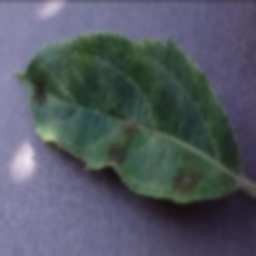

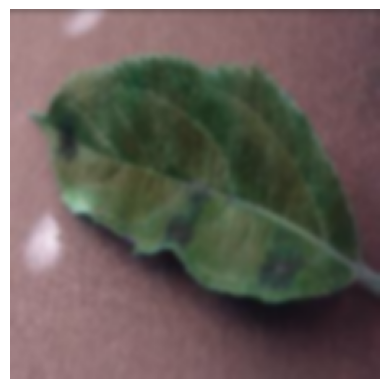

Blurring of potato images completed.


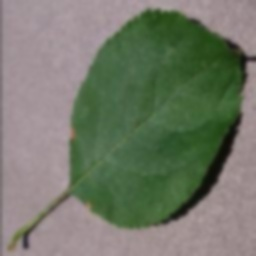

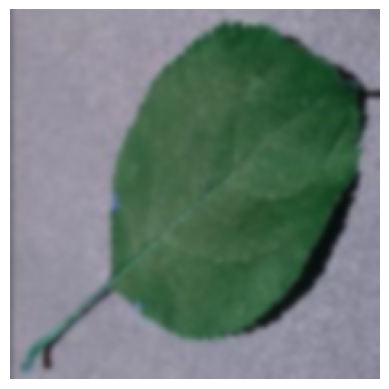

Blurring of potato images completed.


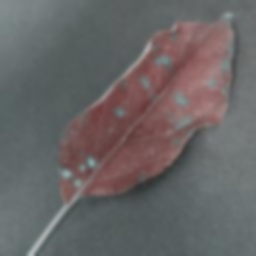

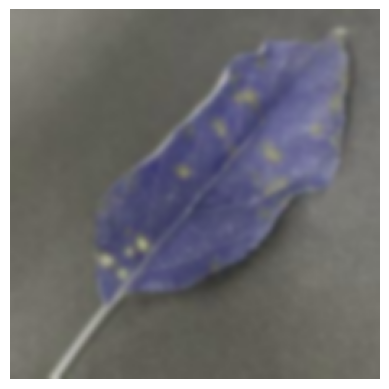

Blurring of potato images completed.


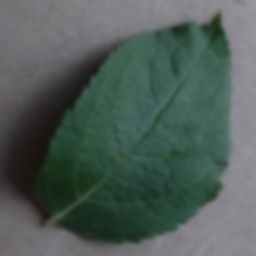

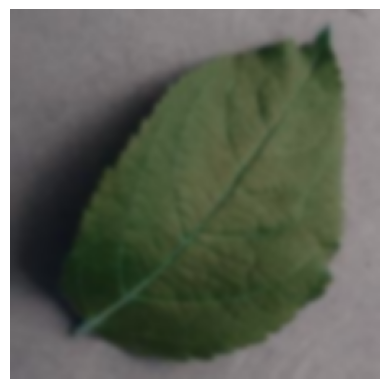

Blurring of potato images completed.


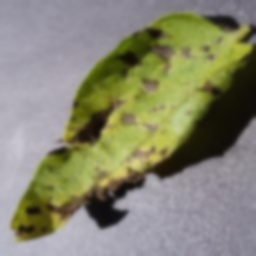

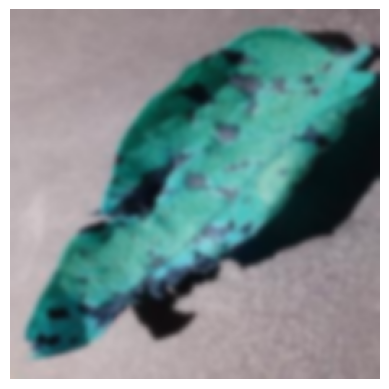

Blurring of potato images completed.


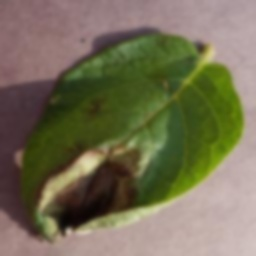

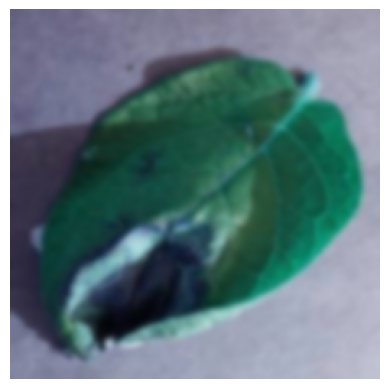

In [ ]:
required_dataset = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust',
                    'Apple___healthy', 'Potato___Early_blight', 'Potato___Late_blight',
                    'Potato___healthy', 'Peach___Bacterial_spot', 'Peach___healthy',
                    'Strawberry___Leaf_scorch', 'Strawberry___healthy']

# Specify the directory containing your original potato images
original_images_dir = train_path

# Specify the directory where you want to save the blurred potato images
blurred_images_dir = '/content/sample_data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'

for disease in required_dataset:
    make_blur(os.path.join(original_images_dir, disease), os.path.join(blurred_images_dir, disease))

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

def make_blur_and_save_pdf(original_images_dir, blurred_images_dir, pdf_filename):
    if not os.path.exists(blurred_images_dir):
        os.makedirs(blurred_images_dir)

    sigma = 2.0
    pdf_pages = PdfPages(pdf_filename)  # Create a PDF file

    for filename in os.listdir(original_images_dir):
        if filename.endswith('.JPG') or filename.endswith('.png'):
            image_path = os.path.join(original_images_dir, filename)
            img = cv2.imread(image_path)
            blurred_img = cv2.GaussianBlur(img, (0, 0), sigma)
            output_path = os.path.join(blurred_images_dir, filename)
            cv2.imwrite(output_path, blurred_img)

            # Add the blurred image to the PDF
            fig, ax = plt.subplots(1, 2, figsize=(10, 5))
            ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            ax[0].set_title('Original Image')
            ax[0].axis('off')
            ax[1].imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
            ax[1].set_title('Blurred Image')
            ax[1].axis('off')
            pdf_pages.savefig(fig)  # Save the figure to the PDF
            plt.close()

    pdf_pages.close()  # Close the PDF file
    print("Blurred images saved as", pdf_filename)

# Call the function to create and save the blurred images as a PDF
pdf_filename = '/content/sample_data/blurred_images_visualization.pdf'
make_blur_and_save_pdf(original_images_dir, blurred_images_dir, pdf_filename)


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
np.random.seed(0)
import itertools
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#train_gen = image_dataset_from_directory(directory="../input/new-plant-diseases-dataset/train",image_size=(256, 256))
#test_gen = image_dataset_from_directory(directory="../input/new-plant-diseases-dataset/valid",image_size=(256, 256))

train_gen = image_dataset_from_directory(directory="/content/sample_data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train",
                                         image_size=(256, 256))
test_gen = image_dataset_from_directory(directory="/content/sample_data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid",
                                        image_size=(256, 256))

rescale = Rescaling(scale=1.0/255)
train_gen = train_gen.map(lambda image,label:(rescale(image),label))
test_gen  = test_gen.map(lambda image,label:(rescale(image),label))

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1568,activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(38,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 28, 64)        0         
 g2D)                                                   

In [ ]:

ep = 10
history = model.fit_generator(train_gen,
          validation_data=test_gen,
          epochs = ep)

Epoch 1/10
2197/2197 [==============================] - ETA: 0s - loss: 1.6583 - accuracy: 0.5181

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

In [ ]:
labels = []
predictions = []
for x,y in test_gen:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x),1).numpy())

In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

In [ ]:
plt.figure(figsize= (20,5))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()